In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Titanic_test.csv to Titanic_test.csv


In [3]:
data=pd.read_csv('Titanic_test.csv')
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**APPLYING EDA**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
data[data.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [7]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [8]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [9]:
data=pd.get_dummies(data,columns=['Sex'],dtype='int')
data

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,Q,0,1
1,3,47.0,1,0,7.0000,S,1,0
2,2,62.0,0,0,9.6875,Q,0,1
3,3,27.0,0,0,8.6625,S,0,1
4,3,22.0,1,1,12.2875,S,1,0
...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,S,0,1
414,1,39.0,0,0,108.9000,C,1,0
415,3,38.5,0,0,7.2500,S,0,1
416,3,NaN,0,0,8.0500,S,0,1


In [10]:
labelencoder = LabelEncoder()
data['Embarked'] = labelencoder.fit_transform(data.loc[:,['Embarked']])

In [11]:
data['Embarked'].value_counts()

Embarked
2    270
0    102
1     46
Name: count, dtype: int64

In [12]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,2,1,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,2,0,1
4,3,22.0,1,1,12.2875,2,1,0


Outliers calculation for Pclass
Axes(0.125,0.11;0.775x0.77)
count    418.000000
mean       2.265550
std        0.841838
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
count    418.000000
mean       2.265550
std        0.841838
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
Quartile 1 :  1.0
Quartile 3 :  3.0
Inter-Quartile Range :  2.0
Upper Limit :  6.0
Lower Limit :  -2.0
Empty DataFrame
Columns: [Pclass, Age, SibSp, Parch, Fare, Embarked, Sex_female, Sex_male]
Index: []
__________________________________________________________
Outliers calculation for Age
Axes(0.125,0.11;0.775x0.77)
count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64
count    332.000000
mean      30.272590
std       14.181

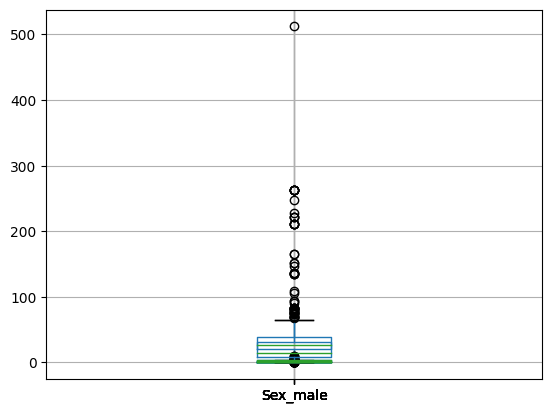

In [13]:
#Outlier Detection for all columns
Num_Columns= ['Pclass','Age','SibSp','Parch','Fare','Embarked','Sex_female','Sex_male']
for i in Num_Columns:
  column_name = i
  print("Outliers calculation for", i)
  print(data.boxplot(column=[column_name],grid=True))
  print(data[column_name].describe())
#Quartile 1
  print(data[column_name].describe())
  Q1=data[column_name].quantile(0.25)
  print('Quartile 1 : ',Q1)
#Quartile 3
  Q3=data[column_name].quantile(0.75)
  print('Quartile 3 : ',Q3)
#Interquartile Range
  IQR= Q3 - Q1
  print('Inter-Quartile Range : ',IQR)
#Upper Limit
  UL = Q3 + (1.5 * IQR)
  print('Upper Limit : ',UL)
#Lower Limit
  LL = Q1 - (1.5 * IQR)
  print('Lower Limit : ', LL)
  Outliers=data[(data[column_name] > UL) | (data[column_name] < LL)]
  print(Outliers)
  print('__________________________________________________________')

In [15]:
print('The % of missing values in Age is', (data['Age'].isnull().sum()/len(data))*100)

The % of missing values in Age is 20.574162679425836


In [16]:
data.corr()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147,0.227983,-0.108615,0.108615
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932,-0.175848,-0.000013,0.000013
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539,0.052708,0.099943,-0.099943
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046,0.054577,0.159120,-0.159120
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000,-0.257183,0.191514,-0.191514
Embarked,0.227983,-0.175848,0.052708,0.054577,-0.257183,1.000000,-0.076281,0.076281
Sex_female,-0.108615,-0.000013,0.099943,0.159120,0.191514,-0.076281,1.000000,-1.000000
Sex_male,0.108615,0.000013,-0.099943,-0.159120,-0.191514,0.076281,-1.000000,1.000000


In [17]:
data['Age'].skew()

0.4573612871503845

<Axes: >

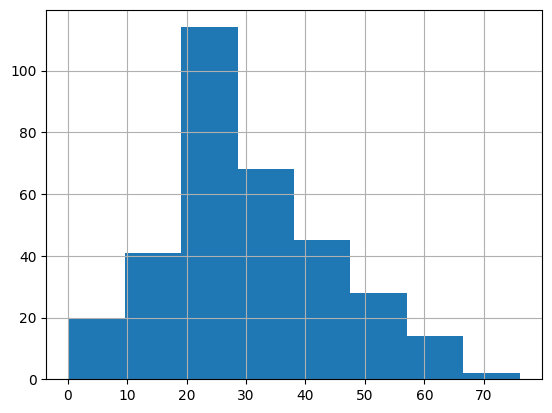

In [18]:
data['Age'].hist(bins=8)     #right skewed

In [19]:
Age_median=data['Age'].median()
print(Age_median)
Age_mean=data['Age'].mean()
print(Age_mean)

27.0
30.272590361445783


In [21]:
data['Age_Full'] = data['Age'].fillna(Age_mean)
data[['Age_Full','Age']]

,Age_Full,Age
0,34.50000,34.5
1,47.00000,47.0
2,62.00000,62.0
3,27.00000,27.0
4,22.00000,22.0
...,...,...
413,30.27259,NaN
414,39.00000,39.0
415,38.50000,38.5
416,30.27259,NaN


In [22]:
data['Age'] = data['Age'].fillna(Age_mean)

In [23]:
data.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      0
Sex_female    0
Sex_male      0
Age_Full      0
dtype: int64

In [24]:
data.drop('Age_Full',axis=1,inplace=True)

In [27]:
data.dropna(subset=['Fare'], inplace=True)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,2,1,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,2,0,1
4,3,22.0,1,1,12.2875,2,1,0


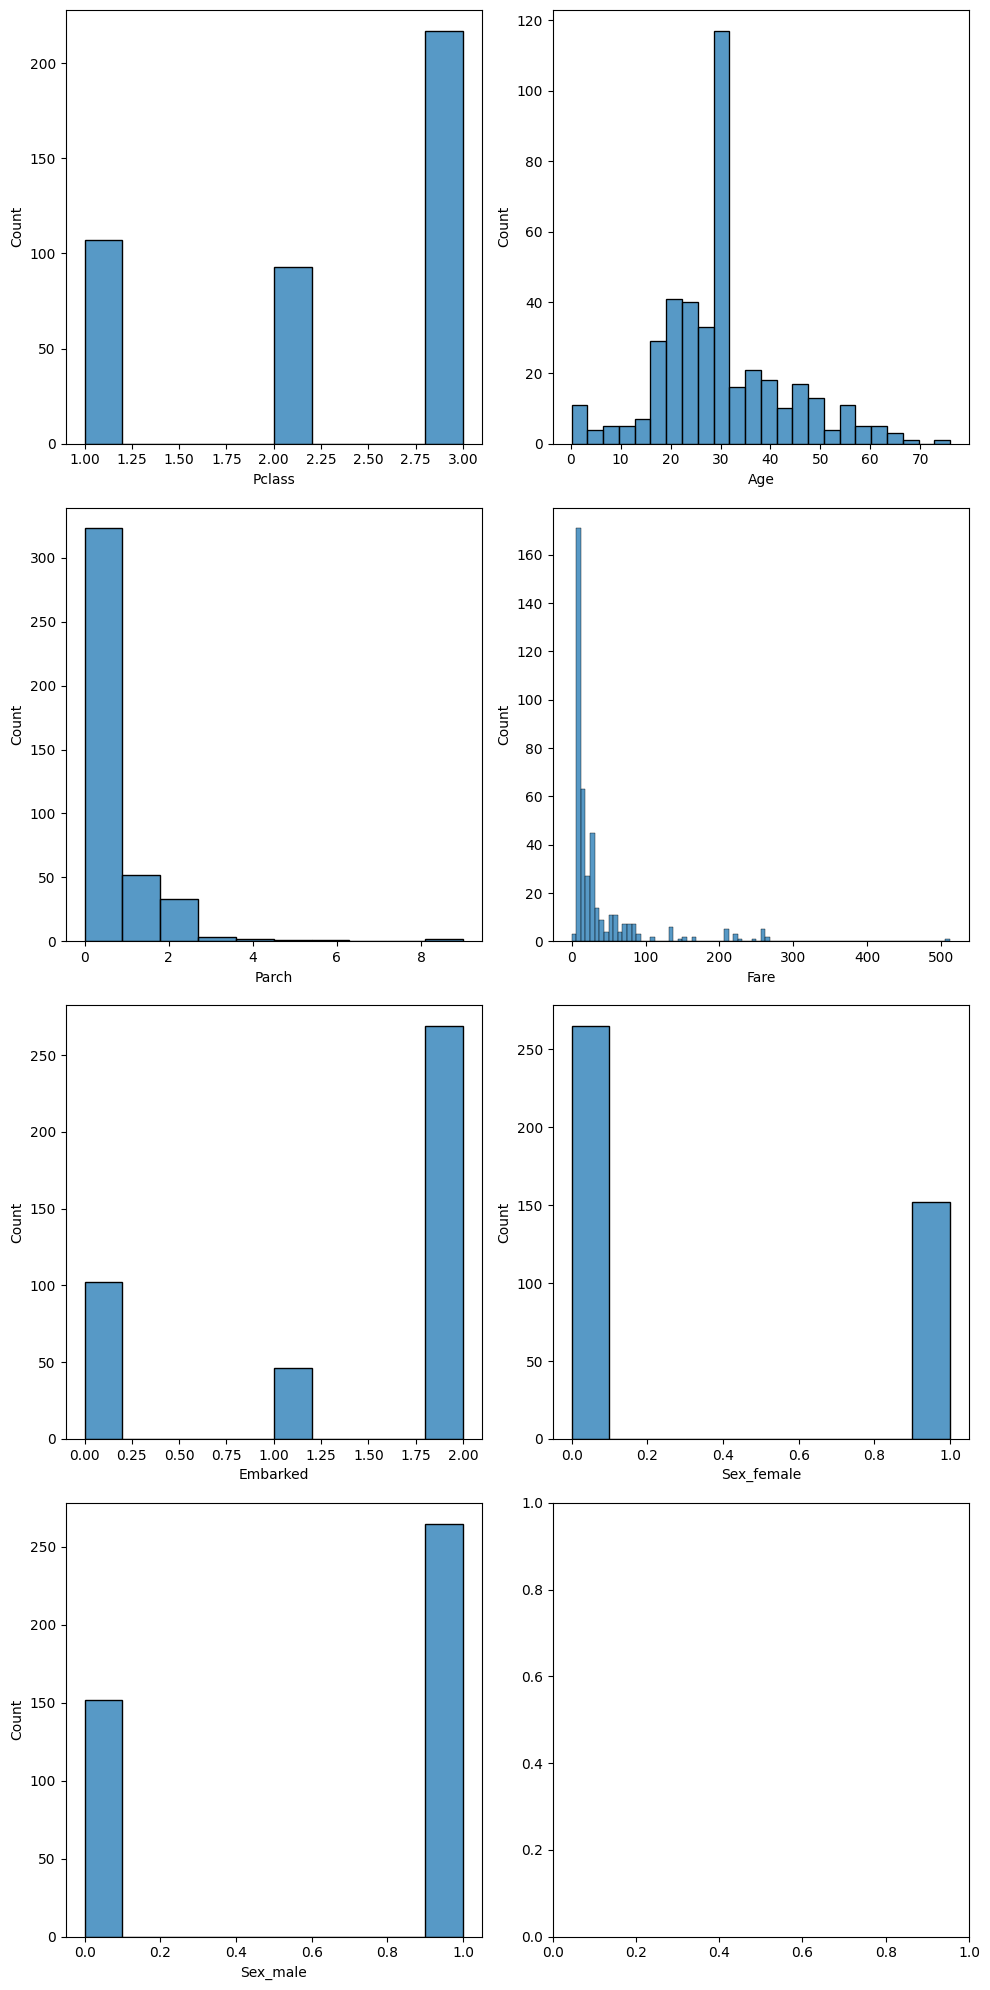

In [28]:
# PLOTTING HISTOGRAM ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(4, 2, figsize=(10, 20))

sns.histplot(data['Pclass'], ax = ax[0,0])
sns.histplot(data['Age'], ax = ax[0,1])
sns.histplot(data['Parch'], ax = ax[1,0])
sns.histplot(data['Fare'], ax = ax[1,1])
sns.histplot(data['Embarked'], ax = ax[2,0])
sns.histplot(data['Sex_female'], ax = ax[2,1])
sns.histplot(data['Sex_male'], ax = ax[3,0])

plt.tight_layout()

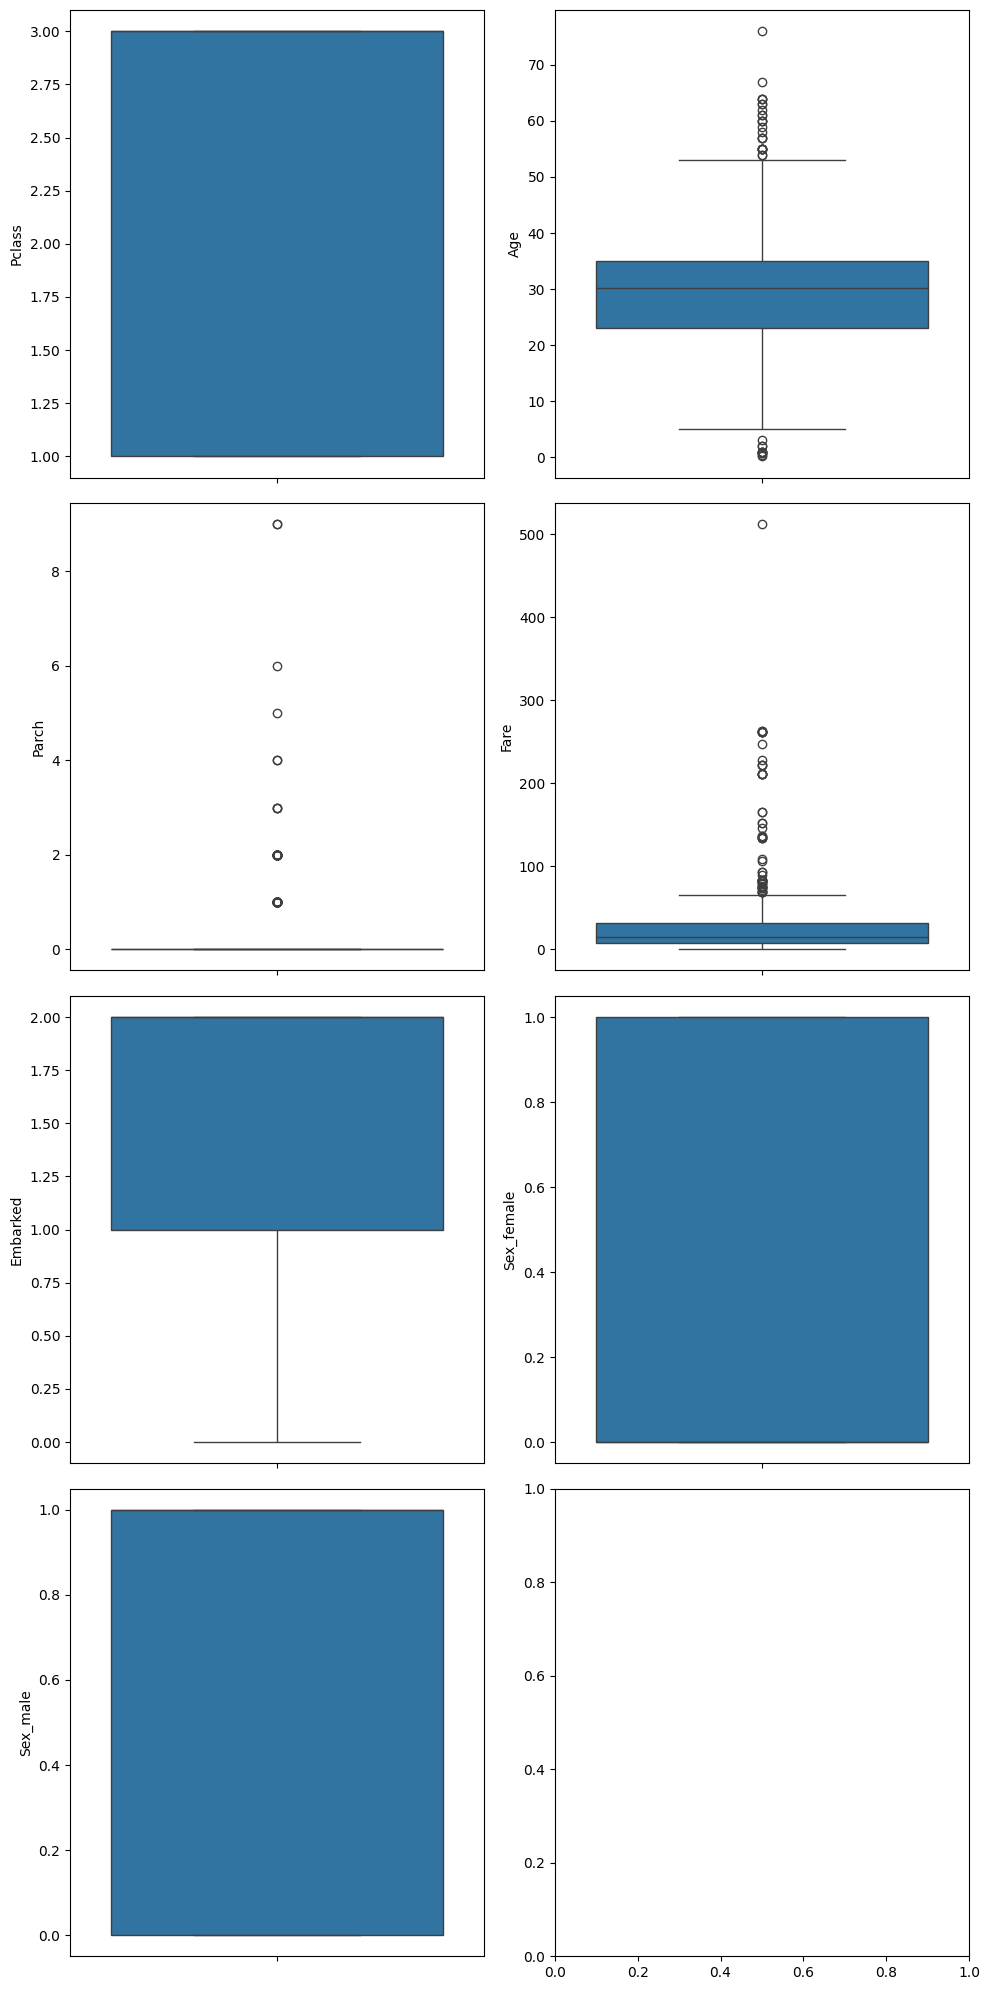

In [29]:
# PLOTTING BOXPLOT ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(4, 2, figsize=(10, 20))

sns.boxplot(data['Pclass'], ax = ax[0,0])
sns.boxplot(data['Age'], ax = ax[0,1])
sns.boxplot(data['Parch'], ax = ax[1,0])
sns.boxplot(data['Fare'], ax = ax[1,1])
sns.boxplot(data['Embarked'], ax = ax[2,0])
sns.boxplot(data['Sex_female'], ax = ax[2,1])
sns.boxplot(data['Sex_male'], ax = ax[3,0])

plt.tight_layout()

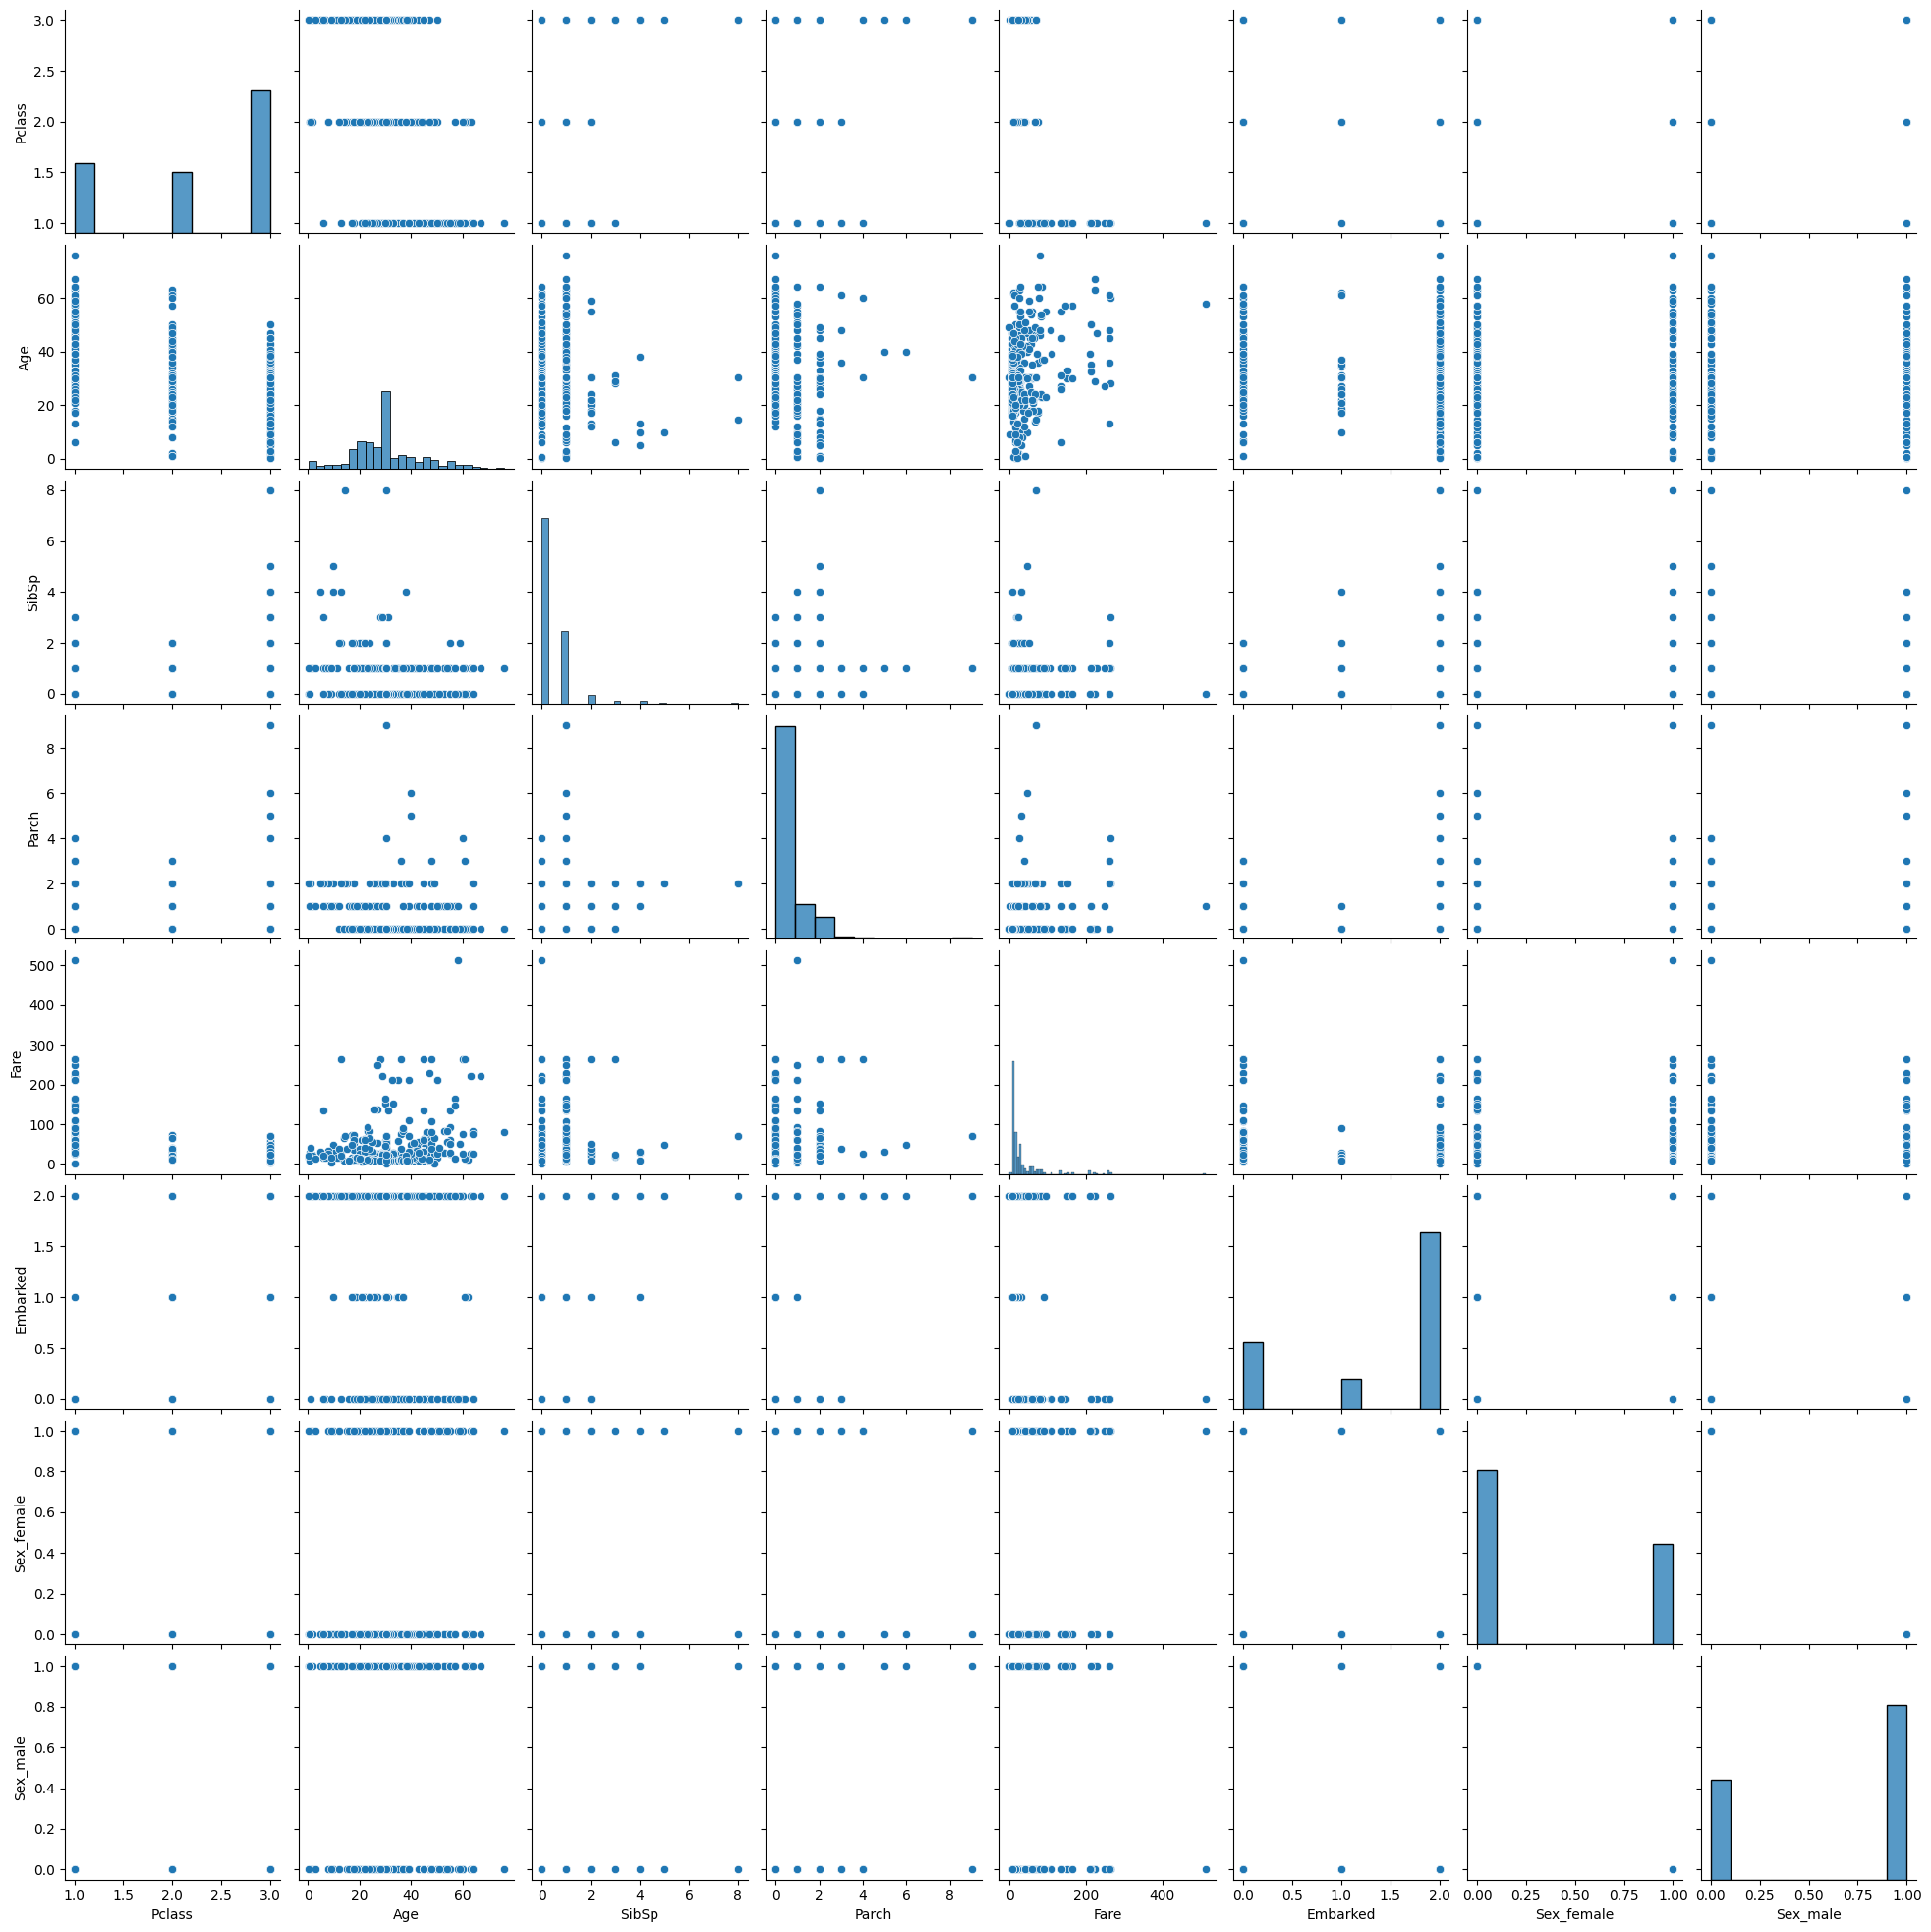

In [30]:
sns.pairplot(data)

In [31]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,2,1,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,2,0,1
4,3,22.0,1,1,12.2875,2,1,0


In [32]:
# split data into X and y
x=data.drop(['Embarked'],axis=1)
y=data[['Embarked']]
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0


In [33]:
y.tail()

,Embarked
413,2
414,0
415,2
416,2
417,0


In [34]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

**XGBOOST**

In [35]:
# fit model into training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [37]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.95%


**LGBM**

In [38]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

In [39]:
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] =['auc' , 'binary_logloss']
params['num_leaves'] = 10
params['max_depth'] = 10

In [44]:
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 252, number of negative: 81
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 333, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.756757 -> initscore=1.134980
[LightGBM] [Info] Start training from score 1.134980


In [45]:
#Prediction
y_pred=clf.predict(X_test)

In [46]:
predictions = [round(value) for value in y_pred]

In [47]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.2857142857142857